# Chapter 12 - Reactive flow and the emergence of melt channels

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import numpy.matlib
from scipy.optimize import fsolve
from scipy.linalg import det
from cycler import cycler

## Linearised stability analysis

### The base state

The assembled, base-state solution is given by


\begin{alignat}{3}
     \label{eq:rxflow-base-state-solution}
    \usat\zeroth &= \left(1+\dpro\right)\e^{\rpro z} - \dpro
    &&\approx 1 + \left(1+\dpro\right) \rpro z,\\
    -\cmppres\zeroth &= \usat\zeroth+\dpro &&\approx
    \left(1+\dpro\right) \left(1 + \rpro z\right),\\
    \por\zeroth &= \left[\frac{\usat\zeroth}
      {1+\stiff\rpro\left(\usat\zeroth+\dpro\right)}\right]^{1/\permexp}
    &&\approx  \cbasestate^{-1}\left[1 + 
      \left(1+\dpro\right) \rpro z/n\right].\\
    w\zeroth &= \left[\frac{1+\stiff\rpro\left(\usat\zeroth+\dpro\right)}
      {\left(\usat\zeroth\right)^{1-\permexp}}\right]^{1/\permexp} 
    &&\approx \cbasestate\left[1 + \left(1+\dpro\right)(1-1/n) \rpro z\right].
\end{alignat}


The base-state solution (1)-(4), are plotted below for two values of $\rpro$. Thick lines are the full solution and narrow lines are the linear approximation. In each case, $\stiff=1$, $\dpro=1$ and $\permexp=3$. The values of $\por\zeroth$ (panel __(c)__) and $w\zeroth$ (panel __(d)__) at $z=0$ are given by $\cbasestate^{-1}$ and $\cbasestate$, respectively.

In [2]:
n = 3.0
G = 1.0
M = np.asarray([0.01, 0.1])
S = 1.0
H = 1.0
z = np.linspace(0.0, H, 1000)

F = np.power([1.0 + S*m*(1+G) for m in M], 1/n)
chi = np.asarray([(1.+G)*np.exp(m*z) - G for m in M])
cmp = -(chi + G)
phi = np.power([chij/(1.0 - S*m*cmpj) for chij, m, cmpj in zip(chi, M, cmp)], 1.0/n)
w = chi/phi
cmpl = -(1.0+G) * np.asarray([1.0 + m*z for m in M])
chil = 1.0 + np.asarray([m*(1+G)*z for m in M])
phil = np.asarray([1.0/Fj * (1.0 + m*(1.0 + G)/n*z) for Fj, m in zip(F, M)])
wl = np.asarray([Fj*(1.0 + m*(1.0+G)*(1.0-1.0/n)*z) for Fj, m in zip(F, M)])

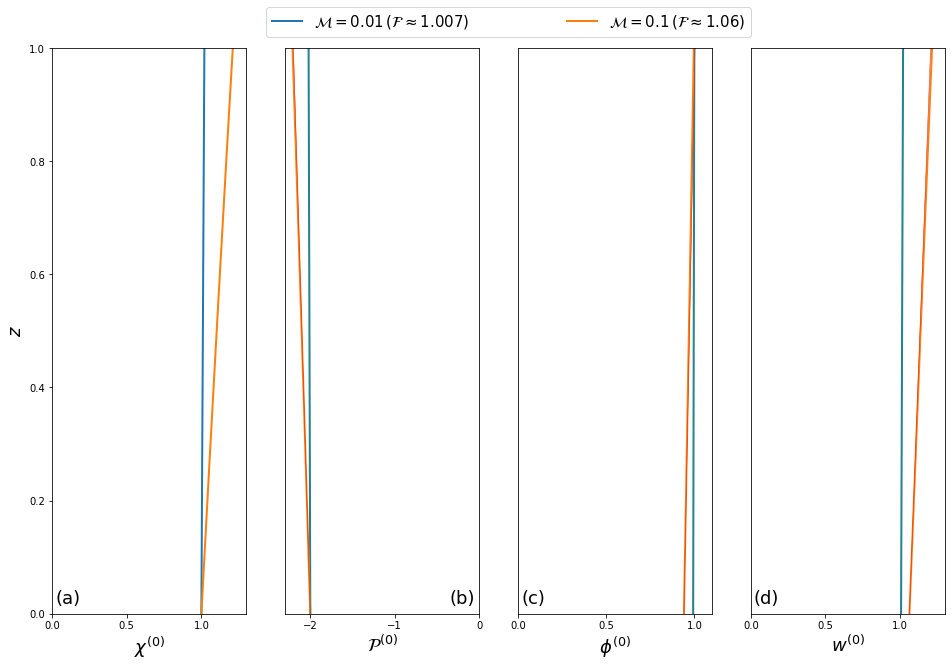

In [3]:
f, ax = plt.subplots(1, 4)
zoom = 2.0
f.set_size_inches(8.0 * zoom, 5.2 * zoom)
f.set_facecolor('w')

plt.rc('axes', prop_cycle=(cycler(color=['k', 'k', 'k', 'k']) + cycler(linestyle=['-', '--', ':', '-.'])))

lines = ax[0].plot(chi.transpose(), z, linewidth=2.0)
ax[0].set_xlabel(r'$\chi^{(0)}$', fontsize=18)
ax[0].set_xlim(0.0, 1.3)
ax[0].set_xticks((0.0, 0.5, 1.0))
ax[0].set_ylabel('$z$', fontsize=18)
ax[0].set_ylim(0.0, 1.0)
ax[0].text(0.02, 0.01, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='left')
plt.legend(handles=(lines[0], lines[1]), 
           labels=(r'$\mathcal{M}=0.01\,(\mathcal{F}\approx1.007)$', r'$\mathcal{M}=0.1\,(\mathcal{F}\approx1.06)$'),
           fontsize=15, bbox_to_anchor=(-2.5, 1.02, 2.5, .2),
           loc='lower right', ncol=2, mode="expand", borderaxespad=0.)

ax[1].plot(cmp.transpose(), z, linewidth=2.0)
ax[1].plot(cmpl.transpose(), z, linewidth=0.5)
ax[1].set_xlabel(r'$\mathcal{P}^{(0)}$', fontsize=18)
ax[1].set_xlim(-2.3, 0.0)
ax[1].set_xticks((-2.0, -1.0, 0.0))
ax[1].set_yticks(())
ax[1].set_ylim(0.0, 1.0)
ax[1].text(-0.35, 0.01, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='left')

ax[2].plot(phi.transpose(), z, linewidth=2)
ax[2].plot(phil.transpose(), z, linewidth=0.5)
ax[2].set_yticks(())
ax[2].set_xlabel(r'$\phi^{(0)}$', fontsize=18)
ax[2].set_xlim(0.0, 1.1)
ax[2].set_xticks((0.0, 0.5, 1.0))
ax[2].set_ylim(0.0, 1.0)
ax[2].text(0.02, 0.01, '(c)', fontsize=18, verticalalignment='bottom', horizontalalignment='left')

ax[3].plot(w.transpose(), z, linewidth=2)
ax[3].plot(wl.transpose(), z, linewidth=0.5)
ax[3].set_xlabel(r'$w^{(0)}$', fontsize=18)
ax[3].set_yticks(())
ax[3].set_xlim(0.0, 1.3)
ax[3].set_ylim(0.0, 1.0)
ax[3].set_xticks((0.0, 0.5, 1.0))
ax[3].text(0.02, 0.01, '(d)', fontsize=18, verticalalignment='bottom', horizontalalignment='left')

plt.show()

### The growth rate of perturbations

The perturbation to the base-state compaction pressure is an ansatz with unknown $k,m_j,\sigma$, constructed from
eigenfunctions of the differential operators, given by
\begin{equation}
  \label{eq:rxflow-cbs-ansatz}
  \cmppres\first(x,z,t) = \text{Re}\sum_{j=1}^3 A_j\exp\left(i\wavenumber x +
    m_jz + \sigma t\right),
\end{equation}
where $\text{Re}$ means taking only the real part of the complex expression. Equation \eqref{eq:rxflow-cbs-ansatz} satisfies a linear, partial differential equation that is third order in the $z$ direction

\begin{equation}
  \label{eq:rxflow-cbs-por}
  \left[ \partial_t + \frac{\partial_{tz}}{\Da} 
    -\permexp - \frac{\partial_{txx}}{\Da\Pe}\right]
  \stiff\delsq\cmppres\first = \left[1 +
    \left(\frac{1}{\Da} - \stiff\right)\partial_z- 
    \frac{\partial_{xx}}{\Da\Pe}\right]
  \permexp\partial_z\cmppres\first.
\end{equation}

In [4]:
class PAR:
    def __init__(self, F_=1.0, n_=3, S_=1.0, Da_=1000.0, Pe_=100.0, M_=0.01, G_=1,
                 bc_=2, nz_=2000, tol_=1e-5, plot_=False, step_=0.01, largeDa_=False):
        self.F = F_  # base - state parameter - force to be constant
        self.n = n_  # permeability exponent
        self.S = S_  # rigidity parameter
        self.Da = Da_  # Damkohler number
        self.Pe = Pe_  # Peclet number
        self.M = M_  # solubility gradient parameter
        self.G = G_  # decompression melting parameter
        self.bc_type = bc_  # boundary condition type -- 1) P(1)=0; 2) P'(1)=0
        self.nz = nz_  # number of points for eigenfunction
        self.tol = tol_  # tolerance
        self.plot = plot_  # plot eigenfunction
        self.step = step_  # stepsize in log10(k) - sigma space
        self.largeDa = largeDa_

        
class EIG:
    def __init__(self, p_=0.0, phi_=0.0):
        self.P = p_
        self.phi = phi_


class SA:
    def __init__(self, k_=0.0, sigma_=0.0, m_=0.0, flag_=False):
        self.k = k_
        self.sigma = sigma_
        self.m = m_
        self.eig = EIG()
        self.flag = flag_


class DC:
    def __init__(self, s_=0.0, k_=0.0, m_=0.0):
        self.s = s_
        self.k = k_
        self.m = m_

In [5]:
def zero_by_sigma(sig, k, par):
    m = np.roots(characteristic_polynomial(k, sig, par))
    if par.largeDa:
        residual = np.real(m[0]) * np.sin(np.imag(m[0])) + np.imag(m[0]) * np.cos(np.imag(m[0]))
    else:
        detM = det(boundary_condition_matrix(k, m, sig, par))
        residual = np.real((1.0 - 1.j) * detM)
    return residual

In [6]:
def zero_by_wavenumber(k, sigma, par):
    m = np.roots(characteristic_polynomial(k, sigma, par))
    if par.largeDa:
        residual = np.real(m[0]) * np.sin(np.imag(m[0])) + np.imag(m[0]) * np.cos(np.imag(m[0]))
    else:
        detM = det(boundary_condition_matrix(k, m, sigma, par))
        residual = np.real((1 - 1j) * detM)
    return residual

Substituting \eqref{eq:rxflow-cbs-ansatz} into \eqref{eq:rxflow-cbs-por} we obtain the characteristic polynomial

\begin{equation}
  \label{eq:characteristic-poly-cbs}
  \frac{\sigma}{\Da}m^3 + 
  \left(\sigma\Kk - \frac{n}{\Da\stiff}\right)m^2
  - \left(\frac{n\Kk}{\stiff} +
    \frac{\sigma }{\Da}k^2\right)m + 
  \left(\permexp - \sigma\Kk\right)k^2 = 0,
\end{equation}

where $\Kk = 1 + k^2/\left(\Da\Pe\right)$. For a given value of $\sigma$ (which is, in fact, an unknown), equation \eqref{eq:characteristic-poly-cbs} is solved to obtain the roots $m_j$.

The function `characteristic_polynomial` below evaluates the coefficients of the characteristic polynomial.

In [7]:
def characteristic_polynomial(k, sig, par):
    K = k ** 2 / par.Da / par.Pe / par.F + 1.0
    p3 = 0.0 if par.largeDa else sig / par.Da  # cubic
    p2 = sig * K - par.n * np.power(par.F, 1 + par.n) / par.Da / par.S  # quadratic
    p1 = -(par.n * np.power(par.F, 1 + par.n) * K / par.S + sig * k ** 2 / par.Da)  # linear
    p0 = k ** 2 * (par.n * np.power(par.F, 1 - par.n) - sig * K)  # constant
    p = np.asarray([p3, p2, p1, p0], dtype=object)
    return p.reshape(p.shape[0])

In [8]:
def boundary_condition_matrix(k, m, sig, par):
    if par.bc_type == 1:
        M = np.asarray([[1.0, mi, np.exp(mi)] for mi in m]).transpose()
    elif par.bc_type == 2:
        M = np.asarray([[1.0, mi, mi * np.exp(mi)] for mi in m]).transpose()
    elif par.bc_type == 3:
        q = sig * par.S / par.n
        M = np.asarray([[q * mi - 1.0, q * mi ** 2 - mi - q * k ** 2, mi * np.exp(mi)] for mi in m]).transpose()
    else:
        q = k ** 2 * par.Da / par.DaPe
        M = np.asarray([[1.0 - par.S * mi, mi ** 2 + q * mi, mi * np.exp(mi)] for mi in m]).transpose()
    return M

In [9]:
def form_eigenfunction(k, sigma, par):
    m = np.roots(characteristic_polynomial(k, sigma, par))
    z = np.linspace(0.0, 1.0, par.nz)
    eig = EIG()
    if par.largeDa:
        eig.P = np.exp(np.real(m[0]) * z) * np.sin(np.imag(m[0]) * z)
        eig.P = eig.P / np.max(np.abs(eig.P))
        Q = (m[0] ** 2 - k ** 2) * eig.P
        eig.phi = np.power(par.F, -1.0 - par.n) * par.S / par.n * np.cumsum(Q) * (z[1] - z[0])
    else:
        M = boundary_condition_matrix(k, m, sigma, par)
        subM = M[:, 1::]
        b = -M[:, 0]
        A = np.concatenate((np.asarray([1.0+0.j]), np.linalg.lstsq(subM, b, rcond=None)[0]))
        eig.P = np.sum(np.asarray([Aj * np.exp(mj * z) for Aj, mj in zip(A, m)]).transpose(), axis=1)
        Q = np.sum(np.asarray([(mj ** 2 - k ** 2) * Aj * np.exp(mj * z) 
                               for Aj, mj in zip(A, m)]).transpose(), axis=1)
        eig.phi = np.power(par.F, -1 - par.n) * par.S / par.n * np.cumsum(Q) * (z[1] - z[0])
    return eig

Function `reactive_flow_solve_dispersion` below implements a recipe for obtaining solutions: for a given set of parameters $\permexp$, $\stiff$, $\Da$, $\Pe$ and a chosen horizontal wavenumber $k$, form an initial guess of $\sigma$. Using this guess, obtain the three roots of the characteristic polynomial~\eqref{eq:characteristic-poly-cbs}. Use these roots to form the residual $r$.  If $r$ is below a specified tolerance, accept the guess of $\sigma$ as a solution; otherwise, improve the guess of $\sigma$ (using, for example, $\infd r/\infd\sigma$ and Newton's method) and again form the residual. Repeat this until the tolerance has been satisfied. Then, with the converged value for $\sigma$, obtain the roots $m_j$, take $A_1=1$, and solve equation \eqref{eq:rxflow_cbs_matrix_eqn} for $A_2$ and $A_3$. Use the values of $A_j$ to form the eigenfunction $\cmppres\first$ at $t=0$.

In [10]:
def reactive_flow_solve_dispersion(k_guess, sigma_guess, par, verbose=False):
    # input parameters:
    #   k -- horizontal wavenumber (required)
    #   sigma_guess -- guess at the eigenvalue (optional)
    #   par -- parameter structure (optional)

    sa = SA()

    if type(k_guess) is not np.ndarray:
        # solving for growthrate sigma at a fixed value of wavenumber k
        solve_for_sigma = True
        sa.k = k_guess
        if sigma_guess is None:
            sigma_guess = np.logspace(-1.0, 1.0, 100)
        if type(sigma_guess) is not np.ndarray:
            sigma_guess = np.asarray([sigma_guess])
    else:
        # solving for wavenumber k at a fixed value of growthrate sigma
        solve_for_sigma = False
        sa.sigma = sigma_guess if type(sigma_guess) is not np.ndarray else sigma_guess[0]

    if par.F is None:
        par.F = np.power(1.0 + par.S * par.M * (1.0 + par.G), 1.0 / par.n)

    sigma = np.zeros_like(sigma_guess)
    k = np.zeros_like(k_guess)
    if solve_for_sigma:
        # solve eigenvalue problem to find growth rate of fastest-growing mode
        res = np.zeros_like(sigma_guess)
        exitflag = np.zeros_like(sigma_guess)
        converged = np.zeros_like(sigma_guess)
        problem_sigma = lambda s: zero_by_sigma(s, sa.k, par)
        for j in range(len(sigma_guess)):
            [sigma[j], infodict, exitflag[j], _] = fsolve(problem_sigma, sigma_guess[j], 
                                                          full_output=True, xtol=1.e-14)
            res[j] = infodict["fvec"]
            converged[j] = exitflag[j] == 1 and np.abs(res[j]) < par.tol
            if par.largeDa:
                m = np.roots(characteristic_polynomial(sa.k, sigma[j], par))
                converged[j] = converged[j] and np.pi / 2 < np.abs(np.imag(m[0])) < np.pi
            if par.plot and converged[j] == 1:
                eig = form_eigenfunction(sa.k, sigma[j], par)
                # plt.plot(np.linspace(0.0, 1.0, par.nz), np.real(eig.P))
    else:
        # solve eigenvalue problem to find wavenumber of mode
        problem_wavenumber = lambda s: zero_by_wavenumber(s, sa.sigma, par)
        res = np.zeros_like(k_guess)
        exitflag = np.zeros_like(k_guess)
        converged = np.zeros_like(k_guess)
        for j in range(len(k_guess)):
            [k[j], infodict, exitflag[j], _] = fsolve(problem_wavenumber, k_guess[j], full_output=True, xtol=1.e-14)
            res[j] = infodict["fvec"]
            converged[j] = exitflag[j] == 1 or abs(res[j]) < par.tol
            if par.largeDa:
                m = np.roots(characteristic_polynomial(k[j], sa.sigma, par))
                converged[j] = converged[j] and np.pi / 2 < np.abs(np.imag(m[0])) < np.pi
            if par.plot and converged[j] == 1:
                eig = form_eigenfunction(k[j], sa.sigma, par)
                plt.plot(np.linspace(0.0, 1.0, par.nz), np.real(eig.P))

        # [converged', exitflag', log10(abs(res'))];
    none_converged = not np.sum(converged)

    # handle failure to find solution
    if none_converged:
        if verbose:
            print(f'FAILURE: no solution found for k={k_guess}')
        sa.sigma = np.nan
        sa.k = np.nan
        sa.m = [np.nan, np.nan, np.nan]
        sa.eig.P = np.nan
        sa.flag = False
        return sa
    elif solve_for_sigma:
        sa.sigma = np.amax(sigma[converged != 0])
    else:
        sa.k = np.amax(k[converged != 0])

    sa.m = np.roots(characteristic_polynomial(sa.k, sa.sigma, par))

    # form and check eigenfunction
    sa.eig = form_eigenfunction(sa.k, sa.sigma, par)
    gP = np.gradient(sa.eig.P)

    if (gP < 0).any() and par.bc_type != 1:
        sa.flag = False
        if verbose:
            print(f'FAILURE: non-monotonic eigenfunction for k={sa.k}, sigma={sa.sigma}')
    else:
        sa.flag = True
        if verbose:
            print(f'SUCCESS: monotonic eigenfunction for k={sa.k}, sigma={sa.sigma}')

    if par.plot:
        plt.plot(np.linspace(0, 1, par.nz), np.real(sa.eig.P), linewidth=2)

    return sa

In [11]:
def taylor_series_extension(n, x, y, step, init_Lks):
    if n == 0:
        xguess = init_Lks[0]
        yguess = init_Lks[1]
    elif n == 1:
        xguess = x[0]-step
        yguess = y[0]
    elif n == 2:
        d = np.asarray([x[1]-x[0], y[1]-y[0]])
        d = d/np.sqrt(np.sum(d**2))
        xguess = x[-1] + d[0]*step
        yguess = y[-1] + d[1]*step
    else:
        da = np.asarray([x[-1]-x[-2], y[-1]-y[-2]])
        db = np.asarray([x[-2]-x[-3], y[-2]-y[-3]])
        D = 0.5*(np.sqrt(np.sum(da**2)) + np.sqrt(np.sum(db**2)))
        da = da/np.sqrt(np.sum(da**2))
        db = db/np.sqrt(np.sum(db**2))
        d2 = (da - db)/D
        xguess = x[-1] + da[0]*step + 0.5*d2[0]*step**2
        yguess = y[-1] + da[1]*step + 0.5*d2[1]*step**2

    if np.isinf(xguess) or np.isnan(xguess):
        xguess = x[-1]
    if np.isinf(yguess) or np.isnan(yguess):
        yguess = y[-1]

    return xguess, yguess

In [12]:
def reactive_flow_trace_dispersion_curve(par, Lkbounds, sbounds, init_Lks, verbose=False):
    n = 0  # can n be zero?
    Lk = np.full((1, ), np.inf)  # dictionaries
    s = np.full((1, ), np.inf)
    m = m = np.full((1, 2), np.inf + 0.j, dtype=complex) if par.largeDa \
        else np.full((1, 3), np.inf + 0.j, dtype=complex)

    for j in [0, 1]:
        fails = 0
        while n < 1_000_000:
            Lk_guess, s_guess = taylor_series_extension(n, Lk, s, par.step, init_Lks)
            if Lk_guess <= Lkbounds[0] or Lk_guess >= Lkbounds[1]:
                break
            if s_guess <= sbounds[0] or s_guess >= sbounds[1]:
                break

            if n == 0:
                s_guess = np.linspace(0.1, par.n, 30)
            elif fails <= 1:
                if n % 50 == 0 or n == 0:
                    print(f'Iteration {n}: searching for solution at k={np.power(10, Lk_guess)}')
                s_guess = s_guess * np.linspace(0.99, 1.01, 16)
            elif fails == 2:
                if n % 50 == 0 or n == 0:
                    print(f'Iteration {n}: searching for solution at sigma={s_guess}')
                Lk_guess = Lk_guess * np.linspace(0.99, 1.01, 16)
            else:
                break

            sa = reactive_flow_solve_dispersion(np.power(10., Lk_guess), s_guess, par)

            if sa.flag:
                # found lowest mode; prepare for next iteration
                if n == 0:
                    Lk[n] = np.log10(sa.k)
                    s[n] = sa.sigma
                    m[n] = sa.m
                else:
                    Lk = np.concatenate((Lk, np.asarray([np.log10(sa.k)])))
                    s = np.concatenate((s, np.asarray([sa.sigma])))
                    m = np.concatenate((m, np.asarray([sa.m])))
                n = n + 1
                fails = 0
            else:
                # found higher mode; retry
                fails = fails + 1

        if j == 0:
            s = np.flip(s)
            Lk = np.flip(Lk)
            m = np.flipud(m)

    return DC(s, np.power(10., Lk), m)

In [13]:
par = PAR()

Lkbounds = np.log10([0.1, 400.0])
sbounds = np.asarray([0.05, 4.0])
init_Lks = np.asarray([np.log10(5.0), 3.0])

DC_ref = reactive_flow_trace_dispersion_curve(par, Lkbounds, sbounds, init_Lks)
iref = np.argmax(DC_ref.s)

Iteration 50: searching for solution at k=3.1988709536468964


Iteration 100: searching for solution at k=2.4170492395167464


Iteration 150: searching for solution at k=1.9634875144806418


Iteration 200: searching for solution at k=1.7334681741075595


Iteration 250: searching for solution at k=2.2405416712675925


Iteration 300: searching for solution at k=7.646015891452607


Iteration 350: searching for solution at k=22.486452560086157


Iteration 400: searching for solution at k=68.49264095622937


Iteration 450: searching for solution at k=147.77748323071222
Iteration 450: searching for solution at k=147.77748323071222


Iteration 450: searching for solution at sigma=2.4521173824742863


Iteration 500: searching for solution at k=223.86959964354207
Iteration 500: searching for solution at k=223.86959964354207
Iteration 500: searching for solution at sigma=1.9865134870866583


In [14]:
dpar = par
dpar.Da = 10.0
DC_a = reactive_flow_trace_dispersion_curve(dpar, Lkbounds, sbounds, init_Lks)

Iteration 50: searching for solution at k=3.1245687200977983


Iteration 100: searching for solution at k=2.417227638952335


Iteration 150: searching for solution at k=2.211204287544978


Iteration 200: searching for solution at k=3.9827841895310336


Iteration 250: searching for solution at k=10.085980268799723


Iteration 300: searching for solution at k=18.399710762004737


Iteration 350: searching for solution at k=29.1735691954528


Iteration 400: searching for solution at k=49.38013398663095
Iteration 400: searching for solution at k=49.38013398663095
Iteration 400: searching for solution at sigma=0.6296684995591252


In [15]:
dpar = par
dpar.Da = 100.0
DC_b = reactive_flow_trace_dispersion_curve(dpar, Lkbounds, sbounds, init_Lks)

Iteration 50: searching for solution at k=3.1966003592232886


Iteration 100: searching for solution at k=2.418080086637226


Iteration 150: searching for solution at k=1.9699826564506784


Iteration 200: searching for solution at k=1.765015405546866
Iteration 200: searching for solution at k=1.765015405546866
Iteration 200: searching for solution at sigma=0.5850777050304234


Iteration 250: searching for solution at k=2.5085653228971196


Iteration 300: searching for solution at k=9.45412303467715


Iteration 350: searching for solution at k=27.39805955332484


Iteration 400: searching for solution at k=50.49777052084663


Iteration 450: searching for solution at k=76.75033695919055
Iteration 450: searching for solution at k=76.75033695919055
Iteration 450: searching for solution at sigma=1.7843440109574253


In [16]:
k_iref, s_iref = DC_ref.k[iref], DC_ref.s[iref]
par = PAR()
SA_ref = reactive_flow_solve_dispersion(k_iref, s_iref, par)

lambda_ = 2.0 * np.pi/k_iref
X, Z = np.meshgrid(np.linspace(0.0, 2.0 * lambda_, par.nz), np.linspace(0.0, 1.0, par.nz))
P = np.tile(SA_ref.eig.P, (par.nz, 1)).transpose() * np.exp(1j * k_iref * X)
phi = np.tile(SA_ref.eig.phi, (par.nz, 1)).transpose() * np.exp(1j * k_iref * X)
epsilon = 3.e-5
h = 1.0/(par.nz-1.0)
Px, Pz = np.gradient(P, h, h)
F = par.F
# U =     epsilon*real(-F^(1-par.n)*par.S*Px);
U = epsilon * np.real(-np.power(F,1-par.n) * par.S * Px)
# W = F + epsilon*real(F^2*(par.n-1)*phi - F^(1-par.n)*par.S*Pz);
W = F + epsilon * np.real(np.power(F, 2*(par.n-1)) * phi - np.power(F, 1 - par.n) * par.S * Pz)
Chi = s_iref * phi - P

P = np.real(P)
P = (P - np.amin(P))/(np.amax(P) - np.amin(P))
phi = np.real(phi)
phi = (phi - np.amin(phi))/(np.amax(phi) - np.amin(phi))
Chi = np.real(Chi)
Chi = (Chi - np.amin(Chi))/(np.amax(Chi) - np.amin(Chi))

Figure below illustrates the results of numerical solutions of the stability problem. __(a)__ Dispersion curves: growth rate $\sigma$ as a function of wavenumber $\wavenumber$ from numerical solutions for $\sigma,m_j,A_j$ for three different values of $\Da$. All three curves use the parameters $\Pe=100,\,\rpro=0.01,\,\dpro=\stiff=1$ and $\permexp=3$ (corresponding to the parameters used to compute the base state in the Figure above). The star symbol marks the maximum growth rate for the reference curve. __(b)__ The eigenmode with maximum growth rate $\sigma^*\approx 2.96$ at $\wavenumber^*\approx 24.6$ ($\lambda^*\approx0.26$) for the curve with $\Da=1000$ corresponding to the star marker in panel (a). The perturbation to the compaction pressure $\cmppres\first$ is shown in the grayscale background image. The narrow lines are contours of the porosity perturbation $\por\first$, which has maxima where the compaction pressure has minima. The white curves are streamlines of the flow $\vel\liq = \zhat + \smallpar\vel\first$, with $\smallpar$ chosen to be $3\times10^{-5}$. The velocity perturbation $\vel\first$ is computed with equation $\vel\first = \left(\permexp - 1\right)\por\first\zhat - \stiff\Grad\cmppres\first$.

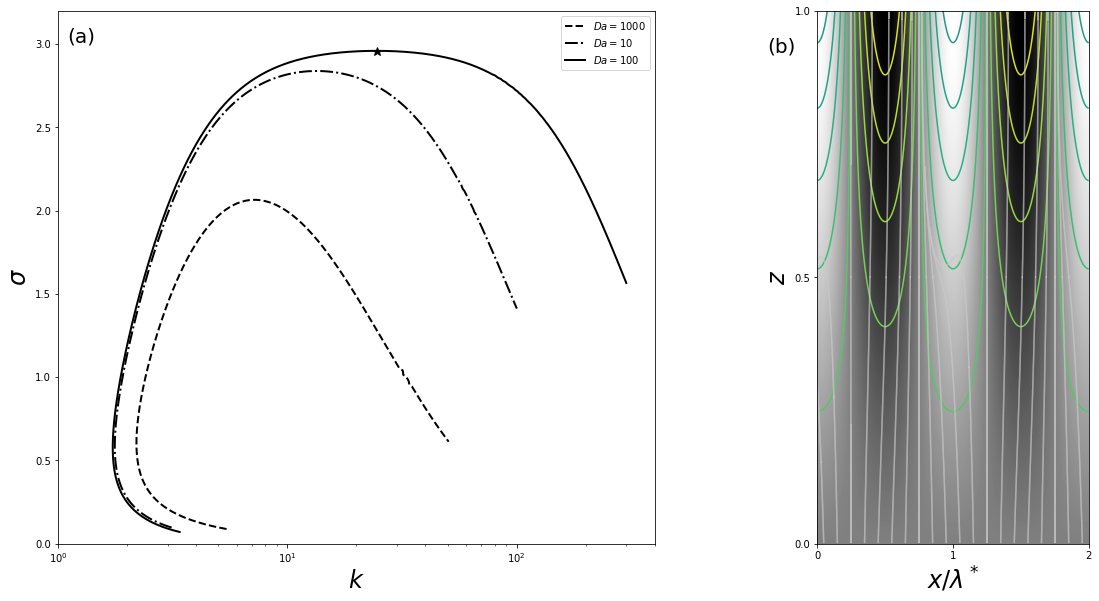

In [17]:
f, ax = plt.subplots()
zoom = 2.0
f.set_size_inches(9.8 * zoom, 4.9 * zoom)
f.set_facecolor('w')

gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 1])

ax0 = plt.subplot(gs[0])
ax0.plot(DC_a.k, DC_a.s, '--k', linewidth=2, label=r'$Da=1000$')
ax0.plot(DC_b.k, DC_b.s, '-.k', linewidth=2, label=r'$Da=10$')
ax0.plot(DC_ref.k, DC_ref.s, '-k', linewidth=2, label=r'$Da=100$')
ax0.plot(DC_ref.k[iref], DC_ref.s[iref], '*k', markersize=9)
ax0.set_xlabel(r'$k$', fontsize=24)
ax0.set_xscale('log')
ax0.set_xlim(1.0, 400.0)
ax0.set_xticks((1e0, 1e1, 1e2))
ax0.set_ylim(0.0, 3.2)
ax0.set_ylabel(r'$\sigma$', fontsize=24)
ax0.text(1.1, 3.1, '(a)', fontsize=20, verticalalignment='top', horizontalalignment='left')
ax0.legend()

ax1 = plt.subplot(gs[1])
ax1.imshow(np.flipud(P), cmap='gray', extent=[0.0, 2.*lambda_, 0.0, 1.0])
ax1.contour(X, Z, phi, levels=np.linspace(-1, 1, 20))
nlines = 20
h = 2.0 * lambda_/(nlines+1.0)
seed = np.zeros((nlines, 2))
seed[:, 0] = np.linspace(0.5*h, 2.0*lambda_-0.5*h, nlines)
seed[:, 1] = 0.001
ax1.streamplot(X, Z, U, W, start_points=seed, integration_direction='forward', density=(60,90),
               color=[0.8, 0.8, 0.8], arrowstyle='-')
ax1.set_xlabel(r'$x/\lambda^*$', fontsize=24)
ax1.set_xlim(0, 2.*lambda_)
ax1.set_xticks((0, lambda_, 2*lambda_))
ax1.set_xticklabels((0, 1, 2))
ax1.set_ylabel(r'$z$', fontsize=24)
ax1.set_ylim(0.0, 1.0)
ax1.set_yticks((0, 0.5, 1))
ax1.text(-0.04, 0.95, '(b)', fontsize=20, verticalalignment='top', horizontalalignment='right')

plt.show()

### The large-Damköhler number limit

Considering the asymptotic limit of large Damköhler number, we can reduce the polynomial \eqref{eq:characteristic-poly-cbs} to second order,
\begin{equation}
  \label{eq:characteristic-poly-quad}
  \left(\sigma\Kk - \frac{\permexp}{\Da\stiff}\right)m^2
  - \left(\frac{\permexp\Kk}{\stiff} +
    \frac{\sigma }{\Da}k^2\right)m + 
  \left(\permexp - \sigma\Kk\right)k^2 = 0.
\end{equation}

The function `characteristic_polynomial` above already includes this case and evaluatees the coefficients of the both characteristic polynomial \eqref{eq:characteristic-poly-cbs} and \eqref{eq:characteristic-poly-quad}.

In [18]:
Lkbounds = np.log10([0.1, 400.0])
sbounds = np.asarray([0.05, 4.0])
init_Lks = np.asarray([np.log10(5.0), 3.0])
DC_cube = {}
DC_quad = {}

for vals in [10., 100., 1000.]:
    par = PAR(Da_=vals, largeDa_=False)
    DC_cube[vals] = reactive_flow_trace_dispersion_curve(par, Lkbounds, sbounds, init_Lks)

    par = PAR(Da_=vals, largeDa_=True)
    DC_quad[vals] = reactive_flow_trace_dispersion_curve(par, Lkbounds, sbounds, init_Lks)

Iteration 50: searching for solution at k=3.1245687200977983


Iteration 100: searching for solution at k=2.417227638952335


Iteration 150: searching for solution at k=2.211204287544978


Iteration 200: searching for solution at k=3.9827841895310336


Iteration 250: searching for solution at k=10.085980268799723


Iteration 300: searching for solution at k=18.399710762004737


Iteration 350: searching for solution at k=29.1735691954528


Iteration 400: searching for solution at k=49.38013398663095
Iteration 400: searching for solution at k=49.38013398663095
Iteration 400: searching for solution at sigma=0.6296684995591252


Iteration 50: searching for solution at k=2.84732236857825


Iteration 100: searching for solution at k=2.1684539523192434


Iteration 150: searching for solution at k=2.0034318446076798


Iteration 200: searching for solution at k=3.86608010058592


Iteration 250: searching for solution at k=7.210475812868525


Iteration 300: searching for solution at k=12.975098176484222


Iteration 350: searching for solution at k=19.613590761853956


Iteration 400: searching for solution at k=31.41769767157009


Iteration 50: searching for solution at k=3.1966003592232886


Iteration 100: searching for solution at k=2.418080086637226


Iteration 150: searching for solution at k=1.9699826564506784


Iteration 200: searching for solution at k=1.765015405546866
Iteration 200: searching for solution at k=1.765015405546866
Iteration 200: searching for solution at sigma=0.5850777050304234


Iteration 250: searching for solution at k=2.5085653228971196


Iteration 300: searching for solution at k=9.45412303467715


Iteration 350: searching for solution at k=27.39805955332484


Iteration 400: searching for solution at k=50.49777052084663


Iteration 450: searching for solution at k=76.75033695919055
Iteration 450: searching for solution at k=76.75033695919055
Iteration 450: searching for solution at sigma=1.7843440109574253


Iteration 50: searching for solution at k=3.1716081333693054


Iteration 100: searching for solution at k=2.3918713804638836


Iteration 150: searching for solution at k=1.945828226514917


Iteration 200: searching for solution at k=1.7430875031866153
Iteration 200: searching for solution at k=1.7430875031866153
Iteration 200: searching for solution at sigma=0.6016792317767701


Iteration 250: searching for solution at k=2.465834516125023


Iteration 300: searching for solution at k=5.541144794491063


Iteration 350: searching for solution at k=14.72956310901313


Iteration 400: searching for solution at k=36.39072173903741


Iteration 450: searching for solution at k=59.33073009263027
Iteration 450: searching for solution at k=59.33073009263027
Iteration 450: searching for solution at sigma=2.100154801117684


Iteration 50: searching for solution at k=3.1988709536468964


Iteration 100: searching for solution at k=2.4170492395167464


Iteration 150: searching for solution at k=1.9634875144806418


Iteration 200: searching for solution at k=1.7334681741075595


Iteration 250: searching for solution at k=2.2405416712675925


Iteration 300: searching for solution at k=7.646015891452607


Iteration 350: searching for solution at k=22.486452560086157


Iteration 400: searching for solution at k=68.49264095622937


Iteration 450: searching for solution at k=147.77748323071222
Iteration 450: searching for solution at k=147.77748323071222
Iteration 450: searching for solution at sigma=2.4521173824742863


Iteration 500: searching for solution at k=223.86959964354207
Iteration 500: searching for solution at k=223.86959964354207


Iteration 500: searching for solution at sigma=1.9865134870866583


Iteration 50: searching for solution at k=3.196354480290182


Iteration 100: searching for solution at k=2.414394543711485


Iteration 150: searching for solution at k=1.9610736498597616


Iteration 200: searching for solution at k=1.7312772090354447


Iteration 250: searching for solution at k=2.23934650936661


Iteration 300: searching for solution at k=6.6767421271372545


Iteration 350: searching for solution at k=18.743160117361917


Iteration 400: searching for solution at k=58.1216832034402
Iteration 400: searching for solution at k=58.1216832034402
Iteration 400: searching for solution at sigma=2.893477059140404


Figure below plots the dispersion curves for growth rate $\sigma$ as a function of wavenumber $\wavenumber$. Curves come from numerical solutions to the full problem (cubic polynomial \eqref{eq:characteristic-poly-cbs}, solid lines) and the large-$\Da$ problem (quadratic \eqref{eq:characteristic-poly-quad}, dashed lines). The agreement for $\Da \ge 100$ suggests that the large-Damköhler approximation is very good for geologically relevant conditions.

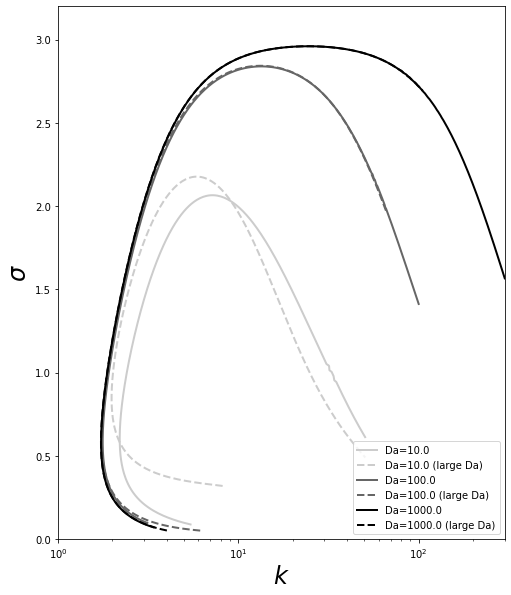

In [19]:
f, ax = plt.subplots()
zoom = 2.0
f.set_size_inches(4.0 * zoom, 4.9 * zoom)
f.set_facecolor('w')

for vals, gray in zip([10., 100., 1000.], [0.8, 0.4, 0.0]):
    plt.plot(DC_cube[vals].k, DC_cube[vals].s, '-', linewidth=2, 
             color=[gray, gray, gray], label=r'Da='+str(vals))
    plt.plot(DC_quad[vals].k, DC_quad[vals].s, '--', linewidth=2, 
             color=[gray, gray, gray], label=r'Da=' + str(vals) + ' (large Da)')

plt.xscale('log')
plt.xlim(1, 300)
plt.xlabel(r'$k$', fontsize=24)
plt.ylim(0, 3.2)
plt.ylabel(r'$\sigma$', fontsize=24)
plt.legend()
plt.show()

### A modified problem and its analytical solution

It is possible to obtain an algebraic equation that can be solved for the growth-rate $\sigma$ as a function of wavenumber $k$ and parameters $\permexp,\Da,\Pe,\stiff$ (recall that $\Kk = 1 + k^2/(\Da\Pe)$). Without any approximations, the growth rate of $l=1$ perturbations is given by

\begin{multline}
  \label{eq:rxflow-analytical-sigma-full}
  \sigma = \pm\frac{\permexp}{\Kk}\left\{\left[ 
      \wavenumber^4\left(1 - \frac{\pi^2}{\Da^4\stiff^2\Kk^2} - 
        \frac{3}{\Da\stiff}\right) -
      \frac{\wavenumber^6}{\Da^3\stiff\Kk^2} -
      \wavenumber^2\left(\frac{\Kk^2}{\stiff^2} +
        \frac{2\pi^2}{\Da^2\stiff^2}\right) - 
      \frac{\pi^2\Kk^2}{\stiff^2}\right]^{1/2}\right. \\ 
  \left. \pm \left(\wavenumber^2 + \frac{2\pi^2 + k^2}{\Da\stiff}\right)\right\} 
  \left[2\left(\pi^2 + k^2\right) + 
    \frac{k^4}{2\Da^2\Kk^2}\right]^{-1}.
\end{multline}

The function `ReactiveFlowAnalyticalSolution` below takes $k, \permexp,\Da,\Pe,\stiff$ as arguments and evaluates the value of $\sigma$ given by equation \eqref{eq:rxflow-analytical-sigma-full}.

In [20]:
class PAR:
    def __init__(self):
        self.s = None
        self.k = None
        self.smax = None
        self.kmax = None
        self.X = None
        self.Y = None
        self.P = None
        self.phi = None
        self.U = None
        self.W = None

        
def ReactiveFlowAnalyticalSolution(k, n, Da, Pe, S):
    K = (1 + k**2 / Da / Pe).astype(np.clongdouble)
    b = np.pi
    # growth rate - upper branch
    full = np.zeros((k.shape[0], 2), dtype=np.clongdouble)
    b2 = b ** 2
    Da2 = Da ** 2
    Da3 = Da ** 3
    Da4 = Da ** 4
    K2 = K ** 2
    K4 = K ** 4
    k2 = k ** 2
    k4 = k ** 4
    k6 = k ** 6
    S2 = S ** 2
    full[:, 0] = (2.0 * n * np.sqrt(-Da4 * K4 * b2 - Da4 * K4 * k2 + Da4 * K2 * S2 * k4
                                    - 3.0 * Da3 * K2 * S * k4 - 2 * Da2 * K2 * b2 * k2 - Da * S * k6 - b2 * k4)
                  + 4 * Da * K * b2 * n + Da * K * k2 * n + 2 * Da2 * K * S * k2 * n) / (
            4 * S * Da2 * K2 * b2 + 4 * S * Da2 * K2 * k2 + S * k4)
    # lower branch
    full[:, 1] = -(2.0 * n * np.sqrt(- Da4 * K4 * b2 - Da4 * K4 * k2 + Da4 * K2 * S2 * k4
                                     - 3 * Da3 * K2 * S * k4 - 2 * Da2 * K2 * b2 * k2 - Da * S * k6 - b2 * k4)
                   - K * (4 * Da * n * b2 + n * (2 * S * Da2 + Da) * k2)) / (
            S * (4 * Da2 * K2 * b2 + 4 * Da2 * K2 * k2 + k4))

    real1 = np.nonzero(np.imag(full[:, 0]).astype(np.float32) == 0.0)
    real2 = np.nonzero(np.imag(full[:, 1]).astype(np.float32) == 0.0)
    s = PAR()
    s.s = np.real(np.concatenate((np.flipud(full[real1, 0].flatten()), full[real2, 1].flatten())))
    s.k = np.real(np.concatenate((np.flipud(k[real1].flatten()), k[real2].flatten())))
    I = np.argmax(s.s)
    s.smax = s.s[I]
    s.kmax = s.k[I]

    # eigenfunctions
    K = 1 + s.kmax ** 2 / Da / Pe
    a = 0.5 * (n * K / S + s.smax * s.kmax ** 2 / Da) / (s.smax * K - n / Da / S)
    m = a + 1j * np.pi
    lambda_ = 2 * np.pi / s.kmax
    x = np.linspace(0, 2 * lambda_, 1000)
    hx = x[2]-x[1]
    y = np.linspace(0, 1, 1000)
    hy = y[2]-y[1]
    s.X, s.Y = np.meshgrid(x, y)
    s.P = np.exp(a * s.Y) * np.sin(np.pi * s.Y) * np.sin(s.kmax * s.X)
    tmp = np.exp(a * s.Y) * np.cos(np.pi * s.Y) * np.sin(s.kmax * s.X)
    dphi_dy = S * ((a ** 2 - np.pi ** 2 - s.kmax ** 2) * s.P + 2 * a * np.pi * tmp) / n
    s.phi = np.cumsum(dphi_dy, axis=0) * hy

    Px, Py = np.gradient(s.P, hx, hy)
    s.U = -S * Px
    s.W = (n - 1) * s.phi - S * Py

    s.P = (s.P - np.amin(s.P)) / (np.amax(s.P) - np.amin(s.P))
    s.phi = (s.phi - np.amin(s.phi)) / (np.amax(s.phi) - np.amin(s.phi))
    
    return s

In [21]:
n = 3.
Da = 1000.
Pe = 100.
S = np.asarray([0.01, 0.1, 1, 10]).astype(np.clongdouble)
k = np.logspace(-1.0, 4.0, 10000).astype(np.clongdouble)
s = []

for s_ in S:
    s.append(ReactiveFlowAnalyticalSolution(k, n, Da, Pe, s_))

Figure below plot the results for the modified problem with $\cmppres\first=0$ at $z=1$. __(a)__ Dispersion curves for $n=3$, $\Da=1000$, $\Pe=100$ and four values of $\stiff$. Maximum values of the growth rate for each curve are marked by stars. The eigenfunctions for each of these maxima are plotted in subsequent panels. __(b)__ The $\cmppres\first$ eigenfunction for $\stiff=1$. White curves are streamlines of the flow $\vel\liq = \zhat + \smallpar\vel\first$, with $\smallpar$ chosen to be $3\times10^{-3}$. __(c)__ $\cmppres\first$ for $\stiff=0.1$ with superimposed contours of the porosity perturbation $\por\first$. Porosity is larger in the low-pressure channels. __(d)__ $\cmppres\first$ for $\stiff=0.01$.

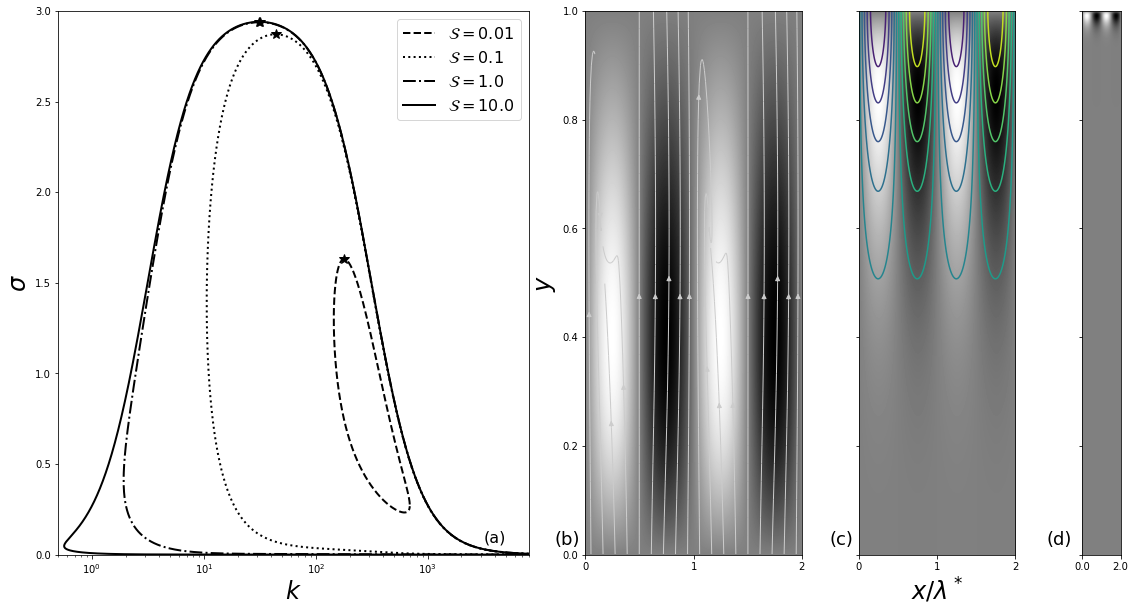

In [22]:
zoom = 2.0
fig = plt.figure(figsize=(zoom*9.7, zoom*5.0))
gs = gridspec.GridSpec(1, 4, width_ratios=[6, 3, 2, 1])

ax0 = plt.subplot(gs[0])
for s_, lstyi, S_ in zip(s, {'--k', '-k', '-.k', ':k'}, S):
    ax0.semilogx(s_.k, s_.s, lstyi, linewidth=2, 
                 label=r'$\mathcal{S}=' + str(np.real(S_).astype(np.float32)) + '$')
    ax0.plot(s_.kmax, s_.smax, '*k', linewidth=1, markersize=10)
ax0.set_xlabel(r'$k$', fontsize=24)
ax0.set_xlim(0.5, 8000)
ax0.set_xticks(ticks=(1.e0, 1.e1, 1.e2, 1.e3))
ax0.set_ylabel(r'$\sigma$', fontsize=24)
ax0.set_ylim(0.0, 3.0)
ax0.legend(fontsize=16)
ax0.text(0.5e4, 0.05, '(a)', fontsize=16, verticalalignment='bottom', horizontalalignment='right')

AR = 2 * np.pi / np.asarray([s[2].kmax, s[1].kmax, s[0].kmax])

ax1 = plt.subplot(gs[1])
lambda_ = np.float32(AR[0])
ax1 = plt.subplot(gs[1])
ax1.imshow(np.real(s[2].P).astype(np.float32), cmap='gray', extent=[0.0, 2.*lambda_, 0.0, 1.0])
ax1.set_ylabel(r'$y$', fontsize=24)
nlines = 18
h = 2 * lambda_ / (nlines + 1)
seed = np.zeros((nlines, 2))
seed[:, 0] = np.linspace(0.5 * h, 2.0 * lambda_ - 0.5 * h, nlines)
seed[:, 1] = np.ones_like(seed[:, 0]) / 1000.0
epsilon = 3e-3
U = epsilon * np.real(s[2].U).astype(np.float64)
W = 1.0 + epsilon * np.real(s[2].W).astype(np.float64)
x = np.linspace(0, 2 * lambda_, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
ax1.streamplot(X, Y, U, W, start_points=seed,
               integration_direction='forward', color=[0.8, 0.8, 0.8], linewidth=1)
ax1.set_xticks((0, AR[0], 2*AR[0]))
ax1.set_xticklabels((0, 1, 2))
ax1.text(-0.01, 0.01, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

ax2 = plt.subplot(gs[2])
lambda_ = np.float32(AR[1])
ax2 = plt.subplot(gs[2])
ax2.imshow(np.flipud(np.real(s[1].P)).astype(np.float32), cmap='gray', extent=[0.0, 2.*lambda_, 0.0, 1.0])
x = np.linspace(0, 2 * lambda_, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
ax2.contour(X, Y, np.real(s[1].phi).astype(np.float32), levels=np.linspace(0, 1, 12))
ax2.set_xticks((0, lambda_, 2*lambda_))
ax2.set_xticklabels((0, 1, 2))
ax2.set_yticklabels(())
ax2.set_xlabel(r'$x/\lambda^*$', fontsize=24)
ax2.text(-0.01, 0.01, r'(c)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

ax3 = plt.subplot(gs[3])
lambda_ = np.float32(AR[2])
ax3.imshow(np.flipud(np.real(s[0].P)).astype(np.float32), cmap='gray', extent=[0.0, 2.*lambda_, 0.0, 1.0])
ax3.set_xticks((0, 2*lambda_))
ax3.set_xticklabels((0., 2.))
ax3.set_yticklabels(())
plt.text(-0.02, 0.01, r'(d)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.show()

Equation \eqref{eq:rxflow-analytical-sigma-full} is exact but difficult to analyse. We therefore design an approximation to be valid only near the peak growth rate:

\begin{equation}
  \label{eq:rxflow-asymptotic-sigma}
  \sigma\sim\permexp(1-\epsilon),\quad\epsilon \ll 1
\end{equation}

and substitute, dropping the $\permexp/\Da\stiff$ terms. We find that

\begin{align}
    \label{eq:rxflow-analytic-real-im-asymptotic_a}
    a &\sim \frac{1}{2\stiff} + \frac{\wavenumber^2}{2\Da}, \\
    \label{eq:rxflow-analytic-real-im-asymptotic_e}
    \epsilon & \sim \frac{a^2 + b^2}{\wavenumber^2} + \frac{\wavenumber^2}{\Da\Pe}.
\end{align}

Here we have made the additional approximation that near the maximum growth rate (i.e., for $\wavenumber\approx\wavenumber^*$ at which $\epsilon \ll 1$), $\wavenumber^2/\Da\Pe \ll 1$ and hence that $\Kk \sim 1$.

The maximum growth rate $\sigma\sim\sigma^*$ occurs where $\epsilon$ is at a minimum with respect to $\wavenumber$.  Using equations \eqref{eq:rxflow-analytic-real-im-asymptotic_a} - \eqref{eq:rxflow-analytic-real-im-asymptotic_e} we find that

\begin{equation}
  \label{eq:rxflow-kstar-full}
  \wavenumber^* \sim \left(\frac{4\Da\Pe\mathcal{B}}
    {4+\Pe/\Da}\right)^{1/4},
\end{equation}

where $\mathcal{B} \equiv b^2 + (2\stiff)^{-2}$. The maximum growth rate $\sigma^*$ of the channel instability is 

\begin{equation}
  \label{eq:rxflow-sstar-full}
  \sigma^* \sim \permexp\left[1 - 
    2\sqrt{\frac{\mathcal{B}(4+\Pe/\Da)}{\Da\Pe}}\right].
\end{equation}


In [23]:
class SA_Growth():
    def __init__(self):
        self.k = None
        self.a = None
        self.e = None
        self.s = None


def asym_maxgrowth(k, n, Da, Pe, S, l):
    b = l * np.pi
    B = b**2 + 1.0/4.0/S**2
    s_ = SA_Growth()
    k = np.power(4.0*Da*Pe*(b**2 + 1.0/4.0/S**2)/(4.0 + Pe/Da), 0.25)
    a = 1.0/2.0/S + k**2.0/2.0/Da
    e = (a**2 + b**2)/k**2 + k**2/Da/Pe
    s = n*(1.0 - 1.0/Da/2.0/S - 2.0*np.sqrt(B*(1.0/Da/Pe + 1.0/4.0/Da**2)))
    s_.k = np.real(k).astype(np.float32)
    s_.a = np.real(a).astype(np.float32)
    s_.e = np.real(e).astype(np.float32)
    s_.s = np.real(s).astype(np.float32)
    return s_

In [24]:
class SA_Dispersion():
    def __init__(self):
        self.s = None
        self.k = None


def asym_dispersion(k, n, Da, Pe, S, l):
    a = 1/2/S + k**2/2/Da
    b = l * np.pi
    epsilon = (a**2 + b**2)/k**2 + k**2/Da/Pe
    s = n*(1-epsilon)
    s[np.imag(s) != 0.0] = np.nan
    return np.real(s).astype(np.float32)


def full_dispersion(k, n, Da, Pe, S, l):
    b = np.clongdouble(l * np.pi)
    b2 = b ** 2
    k2 = k**2
    k4 = k2 * k2
    k6 = k2 * k4
    Da = np.clongdouble(Da)
    Da2 = Da ** 2
    Da3 = Da * Da2
    Da4 = Da2 * Da2
    K = 1.0 + k2 / Da / np.clongdouble(Pe)
    K2 = K ** 2
    K4 = K2 * K2
    S2 = np.clongdouble(S ** 2)

    # upper branch
    su = (2.0 * n * np.sqrt(-Da4 * K4 * b2 - Da4 * K4 * k2 + Da4 * K2 * S2 * k4 - 3.0 * Da3 * K2 * S * k4
                            - 2.0 * Da2 * K2 * b2 * k2 - Da * S * k6 - b2 * k4) + 4.0 * Da * K * b2 * n
          + Da * K * k2 * n + 2.0 * Da2 * K * S * k2 * n) / (4.0 * S * Da2 * K2 * b2 + 4.0 * S * Da2 * K2 * k2 + S * k4)
    iu = np.imag(su) == 0.0
    # lower branch
    sl = -(2.0 * n * np.sqrt(-Da4 * K4 * b2 - Da4 * K4 * k2 + Da4 * K2 * S2 * k4 - 3.0 * Da3 * K2 * S * k4
                             - 2.0 * Da2 * K2 * b2 * k2 - Da*S*k6 - b2 * k4)
           - K*(4 * Da * n * b2 + n * (2.0 * S * Da2 + Da) * k2)) / (S*(4 * Da2 * K2 * b2 + 4.0 * Da2 * K2 * k2 + k4))
    il = np.imag(sl) == 0
    s = SA_Dispersion()
    s.s = np.hstack([np.flip(np.real(su[iu]).astype(np.float32)), np.real(sl[il]).astype(np.float32)])
    s.k = np.hstack([np.flip(np.real(k[iu]).astype(np.float32)), np.real(k[il]).astype(np.float32)])
    return s

Properties of the dispersion curve near its maximum, with $n=3,\,\Da=10^4,\,b=\pi$. __(a)__ Comparison of the exact dispersion relation \eqref{eq:rxflow-analytical-sigma-full} (solid lines) with the asymptotic relations \eqref{eq:rxflow-asymptotic-sigma}-\eqref{eq:rxflow-analytic-real-im-asymptotic_e} (dashed lines) for $\Pe/\Da=10^{-2}$ and two values of $\stiff$, as given in the legend. __(b)__ Contours of fastest-growing (non-dimensional) wavelength $\lambda^*$ for a range of $\stiff$ and $\Pe$ from equation \eqref{eq:rxflow-kstar-full}. Dotted lines are at $\Pe/\Da = 4$ and $\stiff = 1/2\pi$. In both panels, stars indicate the maximum ($\wavenumber^*,\sigma^*$) of the asymptotic curves, computed with \eqref{eq:rxflow-kstar-full} and \eqref{eq:rxflow-sstar-full}.

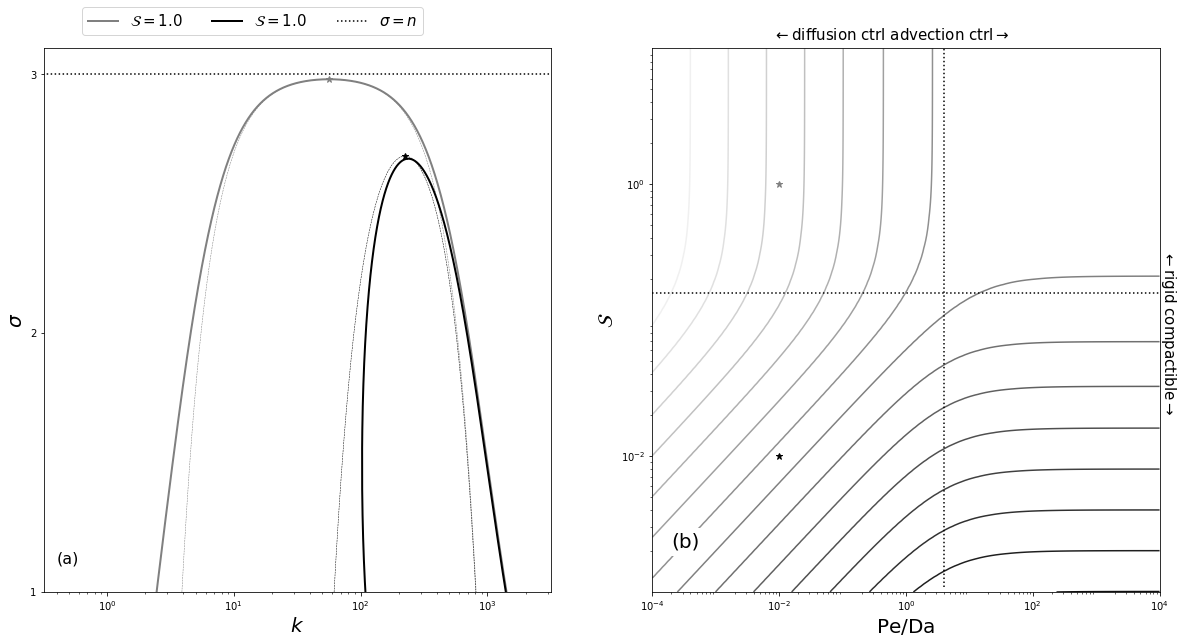

In [25]:
zoom = 2.0
fig = plt.figure(figsize=(10*zoom, 5*zoom))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax0 = plt.subplot(gs[0])

Da = 1e4
k = np.logspace(-1, 4, 10000).astype(np.clongdouble)
n = 3
Pe = Da / 100
S = np.asarray([1.0, 0.01]).astype(np.clongdouble)
l = 1.0

sfull = full_dispersion(k, n, Da, Pe, S[0], l)
sasym = asym_dispersion(k, n, Da, Pe, S[0], l)
smax = asym_maxgrowth(k, n, Da, Pe, S[0], l)
ax0.loglog(sfull.k, sfull.s, '-', linewidth=2, color=[0.5, 0.5, 0.5], label=r'$\mathcal{S}='+str(np.real(S[0]))+'$')
ax0.loglog(np.real(k), sasym, '--', linewidth=0.5, color=[0.5, 0.5, 0.5])
ax0.plot(smax.k, smax.s, '*', markersize=7, color=[0.5, 0.5, 0.5])

sfull = full_dispersion(k, n, Da, Pe, S[1], l)
sasym = asym_dispersion(k, n, Da, Pe, S[1], l)
smax = asym_maxgrowth(k, n, Da, Pe, S[1], l)
ax0.loglog(sfull.k, sfull.s, '-k', linewidth=2, label=r'$\mathcal{S}='+str(np.real(S[0]))+'$')
ax0.loglog(np.real(k), sasym, '--k', linewidth=0.5)
ax0.plot(smax.k, smax.s, '*k', markersize=7)

ax0.plot(np.real([k[0], k[-1]]), [n, n], ':k', label=r'$\sigma=n$')

ax0.set_xlim(np.sqrt(0.1), np.power(10, 3.5))
ax0.set_xticks([1.e0, 1.e1, 1.e2, 1.e3])
ax0.set_xlabel(r'$k$', fontsize=20)

ax0.set_ylabel(r'$\sigma$', fontsize=20)
ax0.set_ylim(1.0, 3.1)
ax0.set_yscale('linear')
ax0.set_yticks([1, 2, 3])

ax0.text(0.4, 1.1, r'(a)', fontsize=16, verticalalignment='bottom', horizontalalignment='left')

ax0.legend(fontsize=15, loc='upper left', bbox_to_anchor=(0.06, 1.09), ncol=3)

ax1 = plt.subplot(gs[1])

Spts = S
Pe_Da = Pe / Da

Pe = np.logspace(np.log10(Da) - 4.0, np.log10(Da) + 4, 100)
S = np.logspace(-3.0, 1.0, 100)
X, Y = np.meshgrid(Pe, S)
B = np.pi ** 2 + 1. / (2 * Y) ** 2
Ks = np.power(4 * Da * X * B / (4 + X / Da), 0.25)
lambda_ = 2 * np.pi / Ks

ax1.contour(Pe / Da, S, np.log10(lambda_), 16, cmap='gray')
ax1.plot([Pe[0]/Da, Pe[-1]/Da], [1/2/np.pi, 1/2/np.pi], ':k')
ax1.plot([4, 4], [S[1], S[-1]], ':k')
ax1.plot(Pe_Da, np.real(Spts[0]), '*', markersize=7, color=[0.5, 0.5, 0.5])
ax1.plot(Pe_Da, np.real(Spts[1]), '*k', markersize=7)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks((1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4))
ax1.set_yticks((1.e-2, 1.e0))
ax1.set_ylabel(r'$\mathcal{S}$', fontsize=20)
ax1.set_xlabel(r'Pe$/$Da', fontsize=20)
ax1.text(0.0002, 0.002, r'(b)', fontsize=20, verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w')
ax1.text(1.4e4, 0.02, r'$\leftarrow$rigid compactible$\rightarrow$', rotation=-90, horizontalalignment='center',
         verticalalignment='bottom', fontsize=15)
ax1.text(0.58, 11, r'$\leftarrow$diffusion ctrl advection ctrl$\rightarrow$', horizontalalignment='center',
         verticalalignment='bottom', fontsize=15)

plt.show()

## Application to the mantle

Parameters and their values (and ranges) for application to the mantle beneath mid-ocean ridges:


| Variable (unit) | Symbol | Estimate (range) |
| --- | --- | --- | 
| Permeability exponent | $\permexp$ | $3$ $(2-3)$ |
| Solubility gradient (m$^{-1}$)  | $\beta$ | $2\times10^{-6}$ ($10^{-6}-4\times10^{-6}$) |
| Compositional offset | $\alpha$ | $1$ |
| Melting region depth (m) | $H$ | $8\times10^{4}$ |
| Compaction length (m) | $\cmplength$ | $10^{3}$  ($3\times10^2-10^4$) |
| Melt flux  (m s$^{-1}$)  | $\por_0 w_0$ | $3\times10^{-11}$ ($5\times10^{-12}-2\times10^{-10}$) |
| Diffusivity (m$^2$s$^{-1}$) | $\por_0 \chemdiffuse$ | $3\times10^{-14}$ ($10^{-15}-10^{-12}$) |
| Reaction rate (s$^{-1}$) | $\rxnrate$ | $3\times10^{-8}$ ($10^{-11}-10^{-4}$) |
| Decompression melting rate (s$^{-1}$) | $W_0\adiprod$ | $3\times10^{-15}$ ($10^{-15} - 10^{-14}$) |
| Melt productivity~ratio | $\dpro$ | $45$ ($1-200$)  |
| Reactive melt volume | $\rpro$ |  $0.14$ ($0.07-0.28$) |
| Peclet number | $\Pe$ | $7\times10^9$ ($3.5\times10^7 - 1.4\times10^{12}$) |
| Damköhler number | $\Da$ | $7 \times 10^7$ ($3.5\times10^3 - 1.4\times10^{12}$) |
| Stiffness number | $\stiff$ | $3\times10^{-5}$ ($1\times10^{-6} - 6\times10^{-3}$) | 

In [26]:
class PAR:
    def __init__(self):
        self.n = 3  # permeability exponent
        self.S = 3e-5  # rigidity parameter
        self.Da = 7e7  # Damkohler number
        self.Pe = 7e9  # Peclet number
        self.H = 8e4  # column height, metres
        self.tscale = 1 * 0.01 / 3e-11 / 2e-6 / (np.pi * 1e7)  # years


def Dispersion(k, n, Da, Pe, S):
    k = k.astype(np.clongdouble)
    k2 = k * k
    k4 = k2 * k2
    k6 = k4 * k2
    n, Da, Pe, S = np.clongdouble([n, Da, Pe, S])
    K = 1 + k ** 2 / Da / Pe
    K2 = K * K
    K4 = K2 * K2
    Da2 = Da * Da
    Da3 = Da2 * Da
    Da4 = Da2 * Da2
    b = np.clongdouble(np.pi)
    b2 = b * b
    S2 = S * S
    # upper branch
    s = (2.0 * n * np.sqrt(-Da4 * K4 * b2 - Da4 * K4 * k2 + Da4 * K2 * S2 * k4 - 3.0 * Da3 * K2 * S * k4
                           - 2 * Da2 * K2 * b2 * k2 - Da * S * k6 - b2 * k4) + 4.0 * Da * K * b2 * n + Da * K * k2 * n
         + 2 * Da2 * K * S * k2 * n) / (4 * S * Da2 * K2 * b2 + 4.0 * S * Da2 * K2 * k2 + S * k4)
    s[np.imag(s) != 0.0] = np.nan
    return np.real(s).astype(np.float32)

Figure below plots the time-scale of channel growth $1/\sigma$ as a function of the horizontal wavelength of channels.  This curve is computed using the full dispersion relation \eqref{eq:rxflow-analytical-sigma-full} with preferred parameter values from table above. Horizontal dotted lines mark the minimum growth time ($\sigma=1/\permexp$, in non-dimensional terms) and this value plus 2\%.

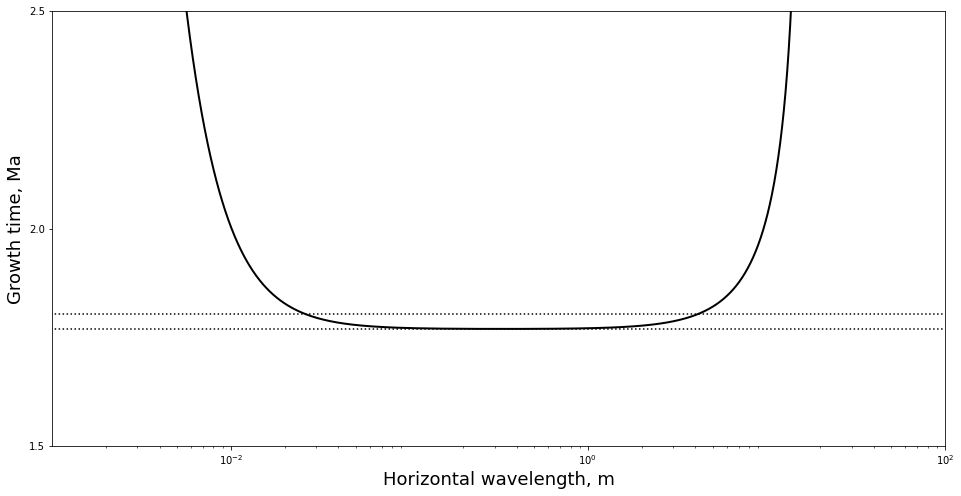

In [27]:
zoom = 2.0
fig = plt.figure(figsize=(8*zoom, 4*zoom))

par = PAR()
k = np.logspace(4, 8, 10000)
s = Dispersion(k, par.n, par.Da, par.Pe, par.S)

lambda_ = (2 * np.pi / k) * par.H  # metres
tau = (1. / s) * par.tscale / 1e6  # million years
tau_ref = (1. / par.n) * par.tscale / 1e6  # million years
tau_ref90 = (1.02 / par.n) * par.tscale / 1e6  # million years

plt.semilogx(lambda_, tau, '-k', linewidth=2)
plt.plot([1e-5, 1e5], [tau_ref, tau_ref], ':k')
plt.plot([1e-5, 1e5], [tau_ref90, tau_ref90], ':k')
plt.xlim(1e-3, 1e2)
plt.ylim(1.5, 2.5)
plt.xticks((1e-2, 1e0, 1e2))
plt.yticks((1.5, 2.0, 2.5))
plt.xlabel('Horizontal wavelength, m', fontsize=18)
plt.ylabel('Growth time, Ma', fontsize=18)

plt.show()